# 1. Problem Description
A Chinese automobile company aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. Essentially, the company wants to know:
####  Which variables are significant in predicting the price of a car
####  How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market.
Business Goal
You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for the management to
understand the pricing dynamics of a new market.
Dataset:  Data
Dear students,
## Apply any 5 algorithms to the regression problem provided.For example:
#### * Linear Regression
#### * Decision Tree Regressor
#### * Random Forest Regressor
#### * Gradient Boosting Regressor
#### * Support Vector Regressor

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew,kurtosis

In [2]:
df = pd.read_csv('CarPrice_Assignment.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


# EDA

In [4]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [7]:
df.info() # No null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [8]:
df.duplicated().sum() 

0

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [10]:
df.describe(include='object').T

,count,unique,top,freq
CarName,205,147,toyota corona,6
fueltype,205,2,gas,185
aspiration,205,2,std,168
doornumber,205,2,four,115
carbody,205,5,sedan,96
drivewheel,205,3,fwd,120
enginelocation,205,2,front,202
enginetype,205,7,ohc,148
cylindernumber,205,7,four,159
fuelsystem,205,8,mpfi,94


In [11]:
for col in df.select_dtypes(include=['object']).columns:
    print(f"unique values in {col}")
    print(df[col].unique())
    print(f"no of unique values - {len(df[col].unique())}")
    print('=====================')

unique values in CarName
['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick century luxus (sw)' 'buick century'
 'buick sky

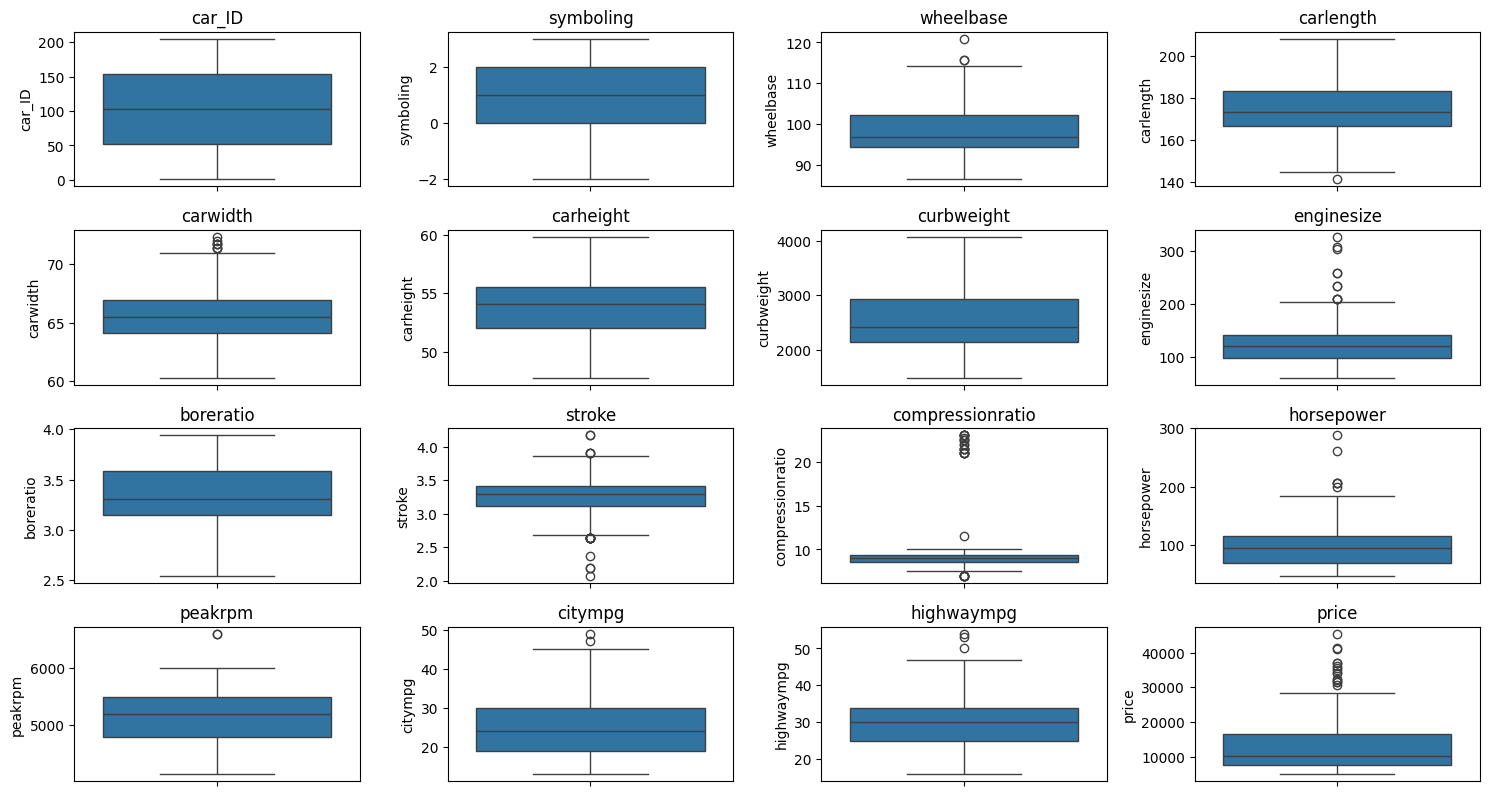

In [12]:
plt.figure(figsize=(15,10))
for i, col in enumerate(df.select_dtypes(include=['int64','float64']).columns):
    plt.subplot(5,4,i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

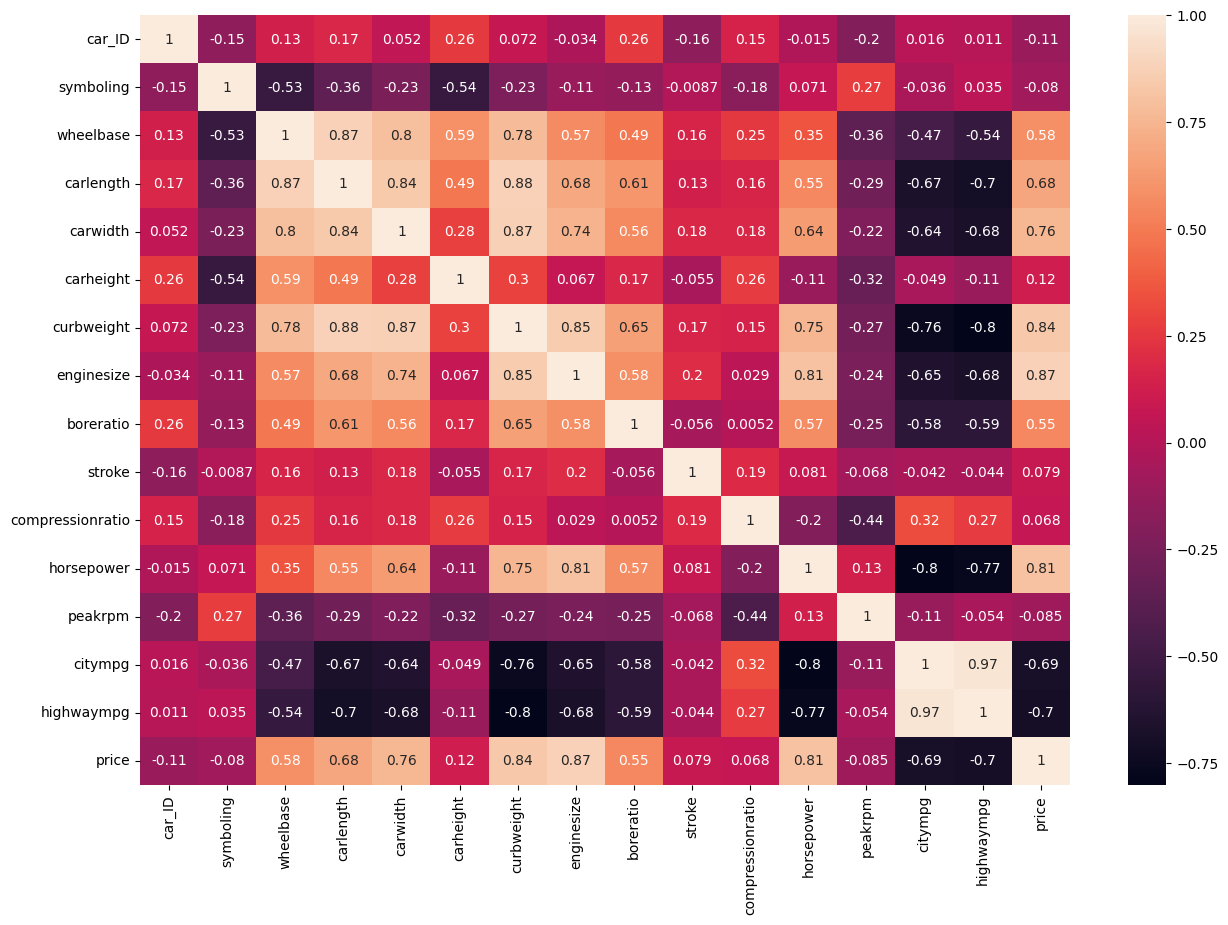

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(df.select_dtypes(include=['int64','float64']).corr(),annot=True)
plt.show()

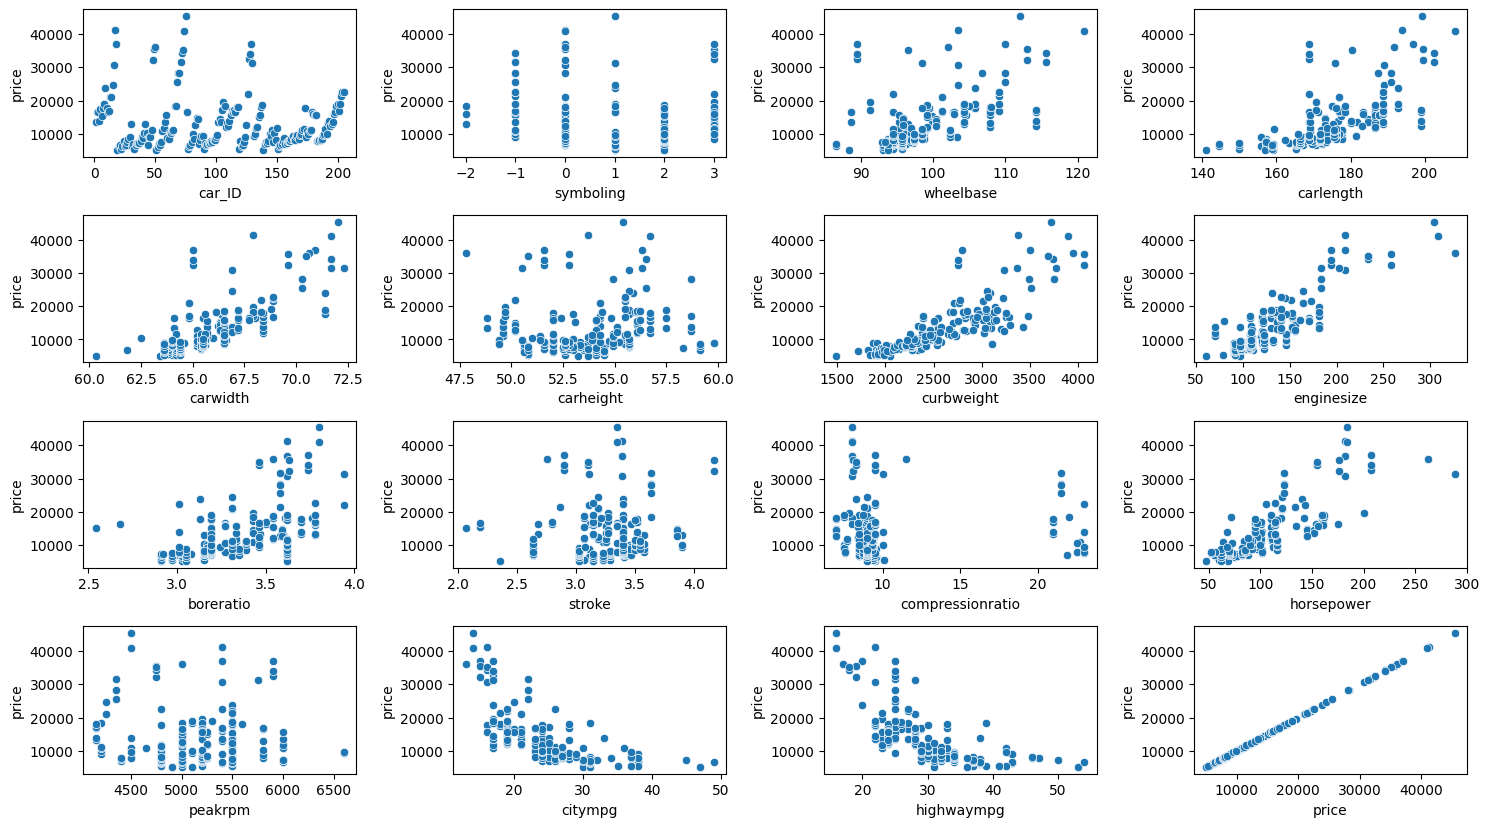

In [15]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.select_dtypes(include=['int64','float64']).columns):
    plt.subplot(5, 4, i+1)
    sns.scatterplot(data=df,x=col,y='price')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

# Data Preprocessing

In [16]:
df['BrandName'] = df['CarName'].str.split().str[0]
print(df[['BrandName']])

       BrandName
0    alfa-romero
1    alfa-romero
2    alfa-romero
3           audi
4           audi
..           ...
200        volvo
201        volvo
202        volvo
203        volvo
204        volvo

[205 rows x 1 columns]


In [17]:
df['BrandName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [18]:
replace_dict_brand = {'maxda':'mazda','nissan':'Nissan','porcshce':'porsche','toyouta':'toyota','vokswagen':'volkswagen','vw':'volkswagen'}
df['BrandName'].replace(replace_dict_brand,inplace=True)
df['BrandName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [19]:
replace_dict_cyl = {'four':4,'six':6,'five':5,'three':3,'twelve':12,'two':2,'eight':8}
df['cylindernumber'].replace(replace_dict_cyl,inplace=True)

In [20]:
df['cylindernumber'].unique()

array([ 4,  6,  5,  3, 12,  2,  8], dtype=int64)

In [21]:
out_cols = ['wheelbase','carlength','carwidth','enginesize','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']

In [22]:
def whisker(col):
    q1,q3 = np.percentile(col,[25,75])
    iqr = q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw

In [23]:
for i in out_cols:
    lw,uw=whisker(df[i])
    df[i]=np.where(df[i]<lw,lw,df[i])
    df[i]=np.where(df[i]>uw,uw,df[i])

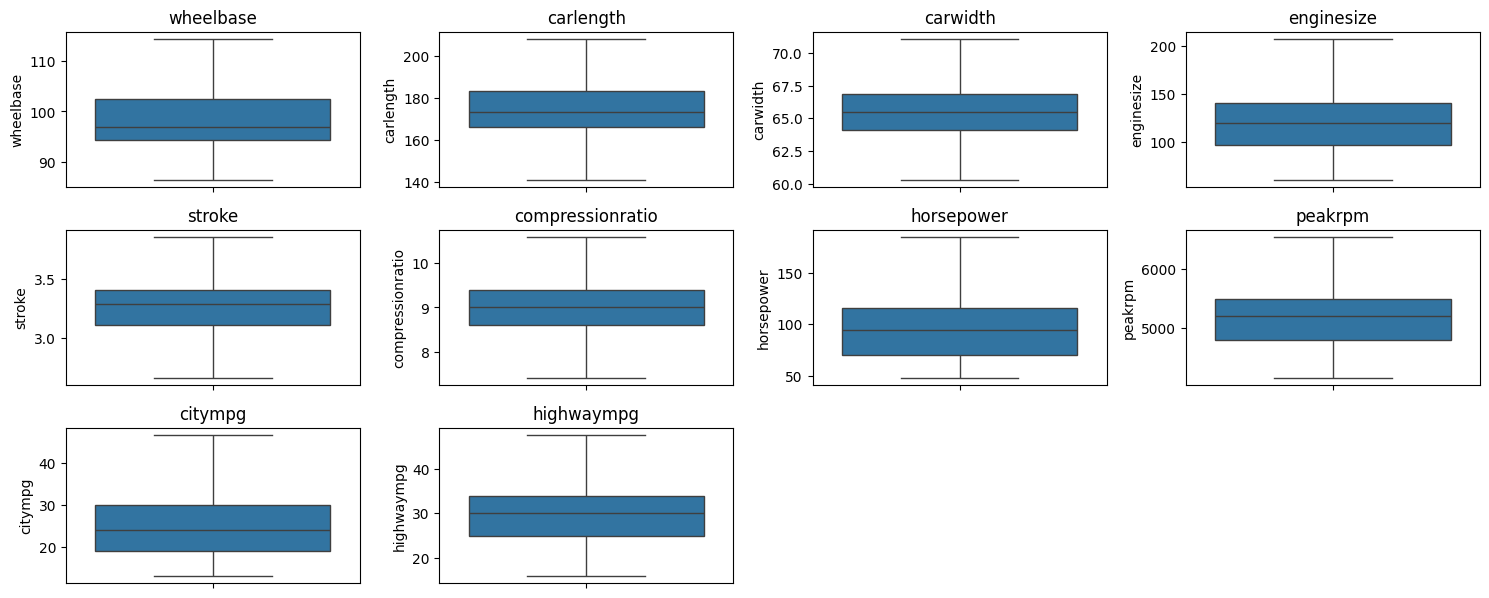

In [24]:
plt.figure(figsize=(15,10))
for i, col in enumerate(out_cols):
    plt.subplot(5,4,i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [24]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'BrandName'],
      dtype='object')

In [25]:
df = df.drop(columns=['car_ID','CarName','doornumber'])
df.columns

Index(['symboling', 'fueltype', 'aspiration', 'carbody', 'drivewheel',
       'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'BrandName'],
      dtype='object')

In [26]:
obj_col = df.select_dtypes(include='object').columns
obj_col

Index(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation',
       'enginetype', 'fuelsystem', 'BrandName'],
      dtype='object')

### Encoding

In [27]:
df_onehot_encoded = pd.get_dummies(df, columns=obj_col)
df_onehot_encoded

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,...,BrandName_mitsubishi,BrandName_peugeot,BrandName_plymouth,BrandName_porsche,BrandName_renault,BrandName_saab,BrandName_subaru,BrandName_toyota,BrandName_volkswagen,BrandName_volvo
0,3,88.6,168.8,64.1,48.8,2548,4,130.0,3.47,2.68,...,False,False,False,False,False,False,False,False,False,False
1,3,88.6,168.8,64.1,48.8,2548,4,130.0,3.47,2.68,...,False,False,False,False,False,False,False,False,False,False
2,1,94.5,171.2,65.5,52.4,2823,6,152.0,2.68,3.47,...,False,False,False,False,False,False,False,False,False,False
3,2,99.8,176.6,66.2,54.3,2337,4,109.0,3.19,3.40,...,False,False,False,False,False,False,False,False,False,False
4,2,99.4,176.6,66.4,54.3,2824,5,136.0,3.19,3.40,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,4,141.0,3.78,3.15,...,False,False,False,False,False,False,False,False,False,True
201,-1,109.1,188.8,68.8,55.5,3049,4,141.0,3.78,3.15,...,False,False,False,False,False,False,False,False,False,True
202,-1,109.1,188.8,68.9,55.5,3012,6,173.0,3.58,2.87,...,False,False,False,False,False,False,False,False,False,True
203,-1,109.1,188.8,68.9,55.5,3217,6,145.0,3.01,3.40,...,False,False,False,False,False,False,False,False,False,True


In [28]:
df_onehot_encoded.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'fueltype_diesel', 'fueltype_gas', 'aspiration_std',
       'aspiration_turbo', 'carbody_convertible', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd',
       'drivewheel_fwd', 'drivewheel_rwd', 'enginelocation_front',
       'enginelocation_rear', 'enginetype_dohc', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'fuelsystem_1bbl', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi',
       'BrandName_Nissan', 'BrandName_alfa-romero', 'BrandName_audi',
       'BrandName_bmw', 'BrandName_buick', 'BrandName_chevrolet',
       'BrandNam

In [29]:
X = df_onehot_encoded.drop(columns=['price'])
y = df_onehot_encoded['price']

In [30]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

In [38]:

from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95) 
X_pca = pca.fit_transform(X_scaled)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [35]:
model_name = []
RMSE = []
MSE = []
MAE = []
R2_Score = []

models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    SVR()
]

for model in models:
    model.fit(X_train,y_train)
    prediction = model.predict(X_test)
    model_name.append(model.__class__.__name__)
    RMSE.append(mean_squared_error(y_test,prediction,squared=False))
    MSE.append(mean_squared_error(y_test, prediction))
    MAE.append(mean_absolute_error(y_test, prediction))
    R2_Score.append(r2_score(y_test,prediction))

C:\Users\akhil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\akhil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\akhil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\akhil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarnin

In [36]:
models_df = pd.DataFrame({'Model-Name':model_name,'RMSE':RMSE,'MSE':MSE,'MAE':MAE,'R2_Score':R2_Score})
models_df = models_df.set_index('Model-Name')
models_df.sort_values('R2_Score',ascending = False)

,RMSE,MSE,MAE,R2_Score
Model-Name,,,,
LinearRegression,3324.487166,1.105221e+07,2457.719338,0.859999
GradientBoostingRegressor,3749.801161,1.406101e+07,1979.077890,0.821886
RandomForestRegressor,3931.032809,1.545302e+07,2076.995841,0.804253
DecisionTreeRegressor,3990.130064,1.592114e+07,2339.418707,0.798324
SVR,9321.137705,8.688361e+07,5700.896155,-0.100572


## Conclusion

#### . Linear Regression model has the highest accuracy of 86%
#### . Gradient boosting model have the  accuracy of 82%
#### . Random forest model have the  accuracy of 80%
#### . Decition Tree model have the  accuracy of 79%
#### . And SVR has the least accuracy 